In [1]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

### Grab all 12 datasets 


['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized (R-R0) / R0. ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized (R-R0) / R0. ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized (R-R0) / R0. ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized (R-R0) / R0. ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.

C:\Users\toppenheim\Desktop\UCSF\Preeya UCB\Strain-Sensor-\Strain-Sensor-\Code\analysis\analysis.py:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots()


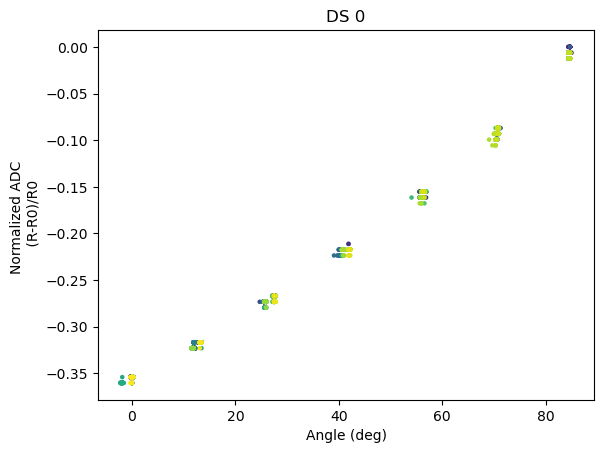

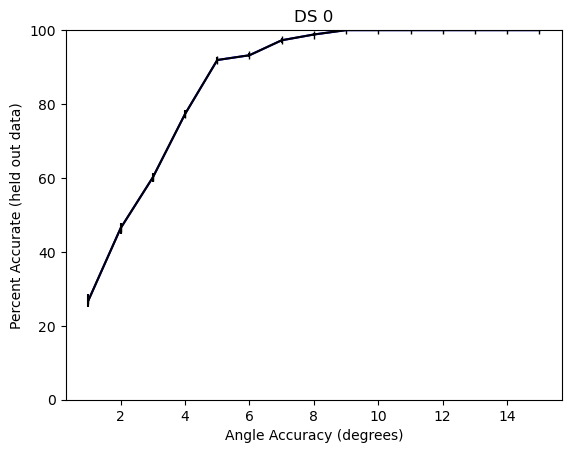

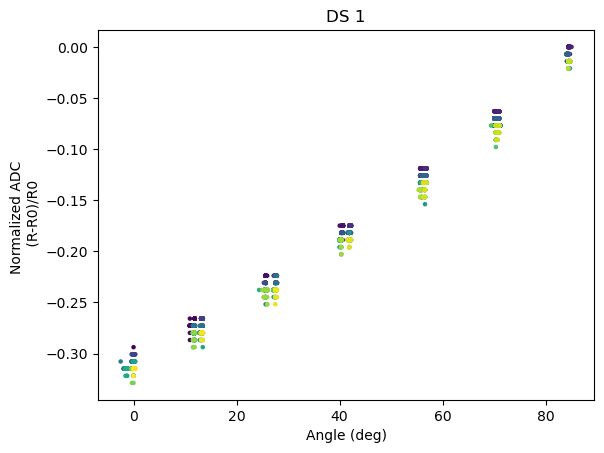

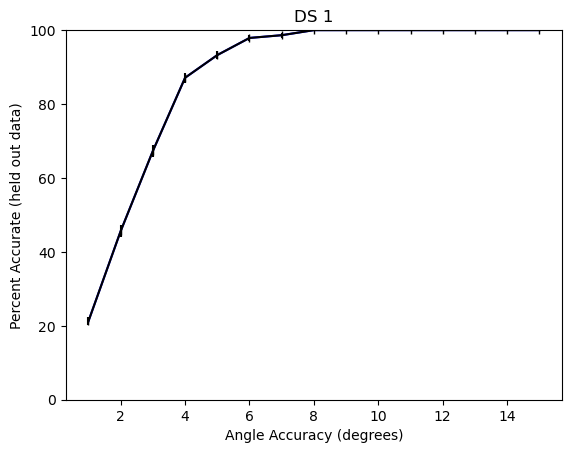

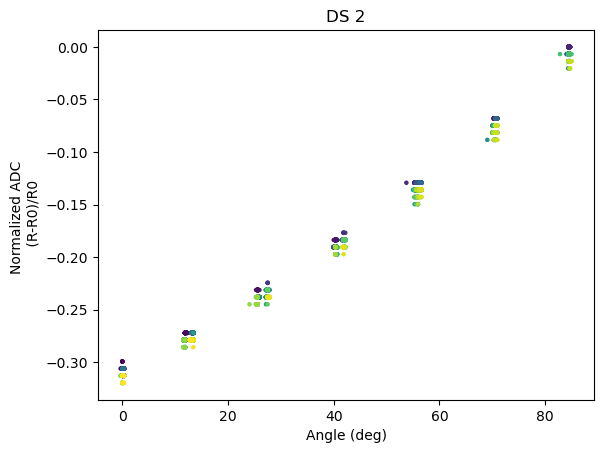

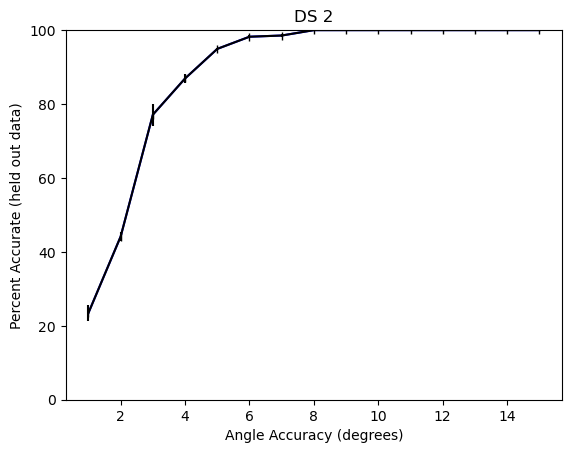

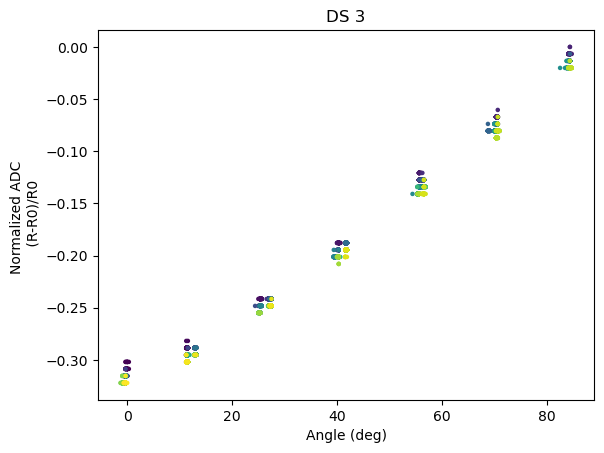

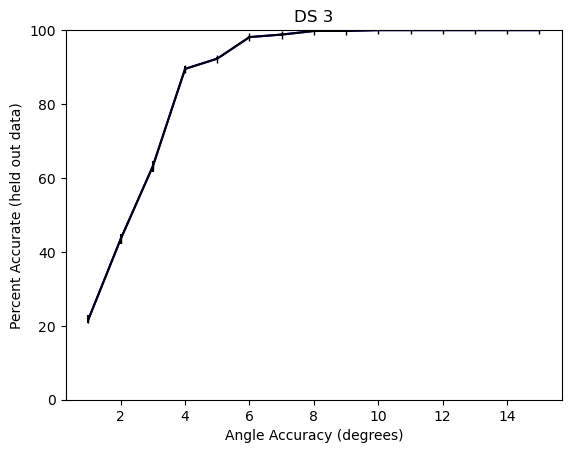

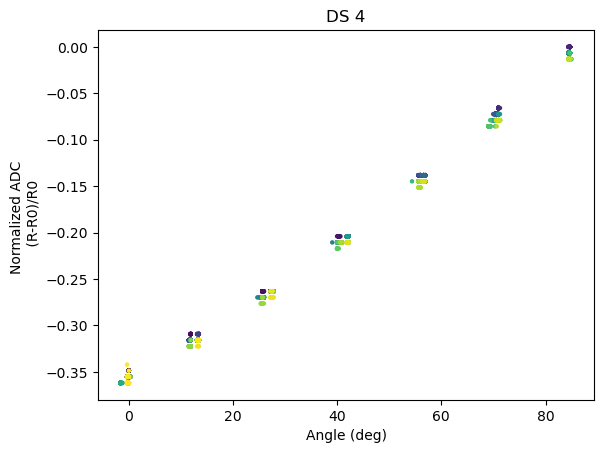

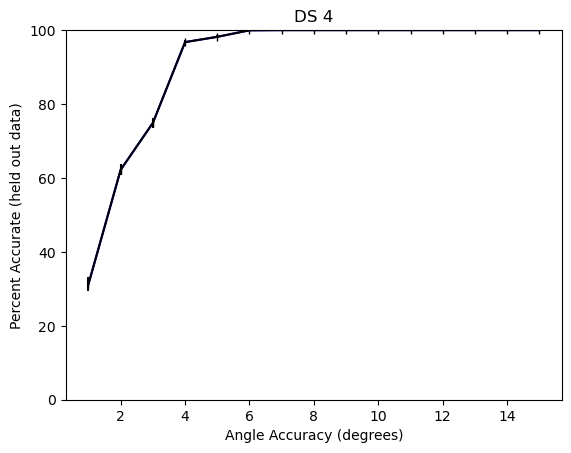

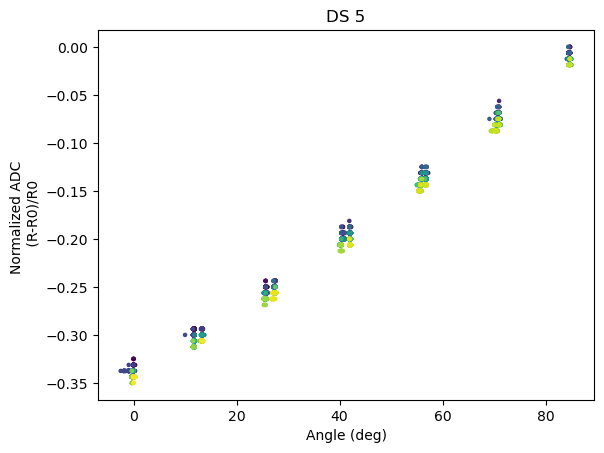

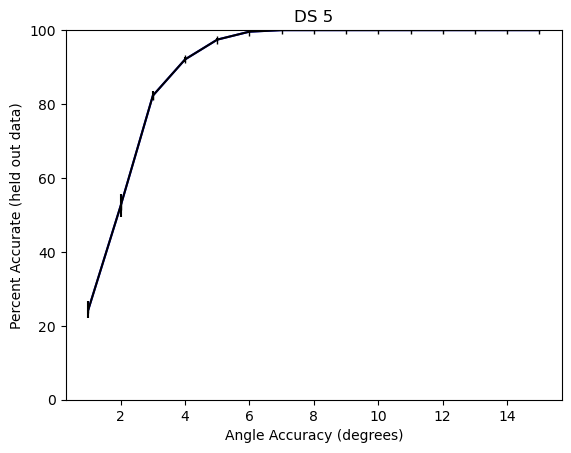

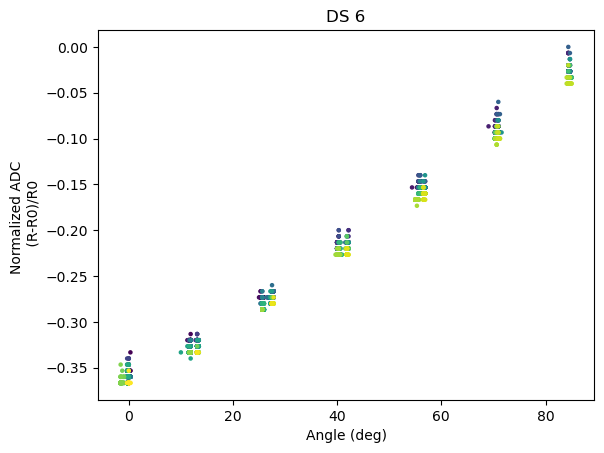

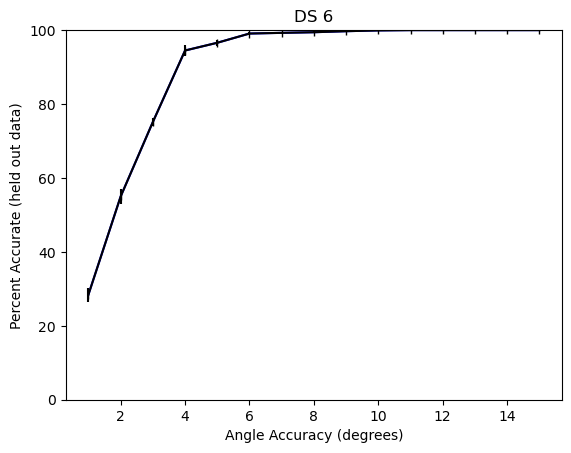

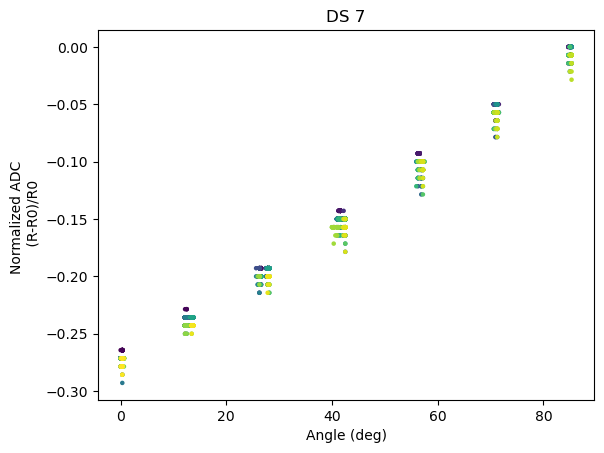

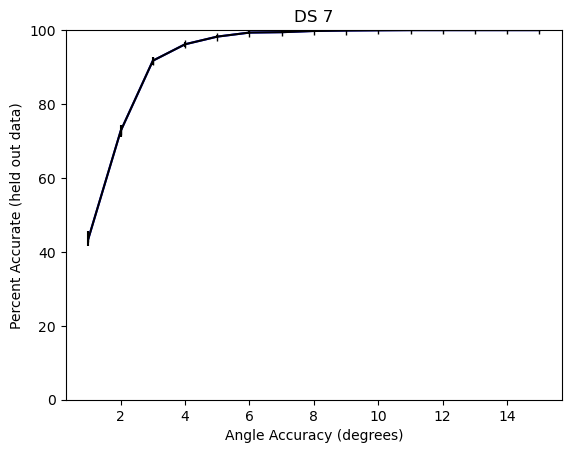

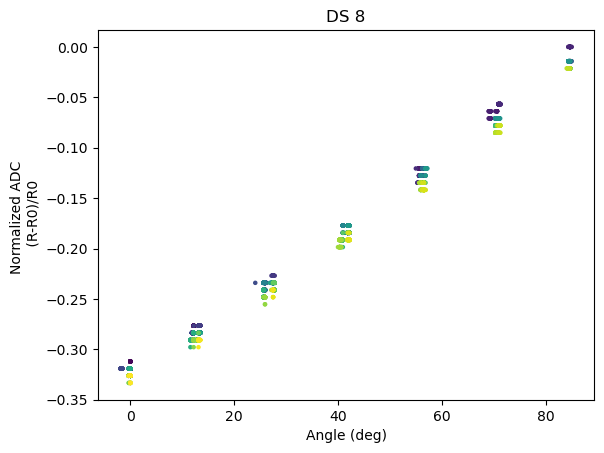

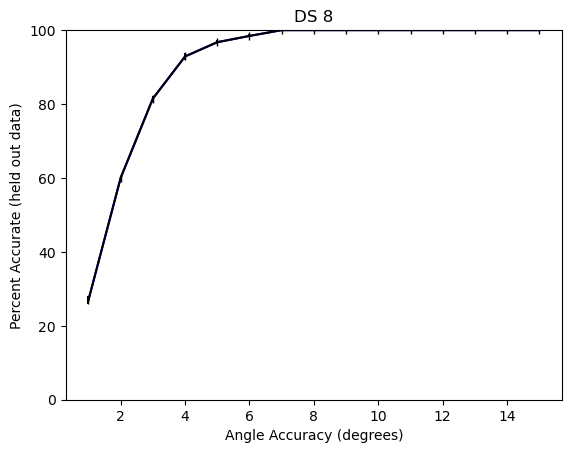

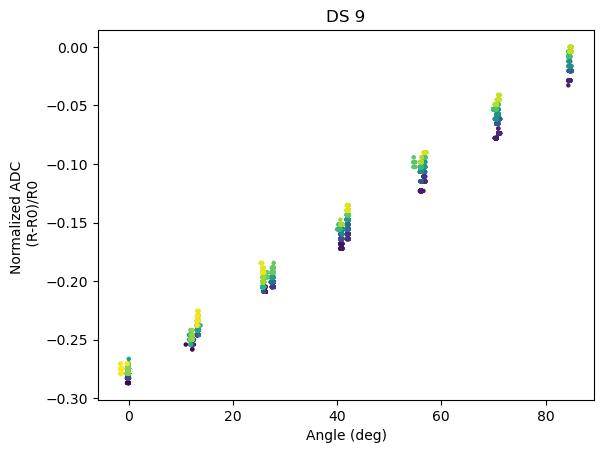

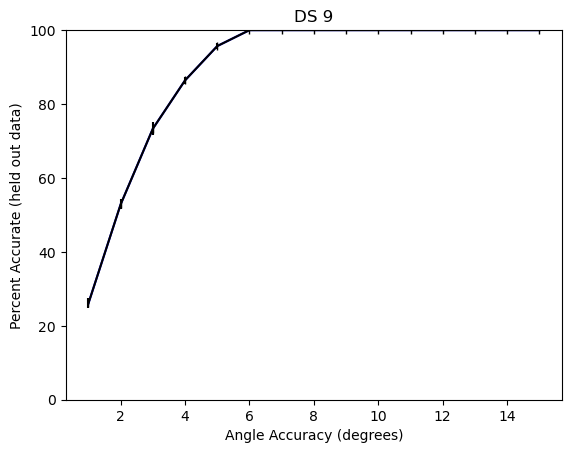

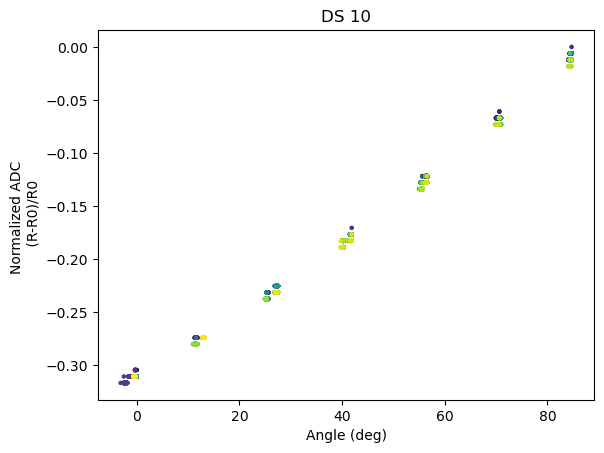

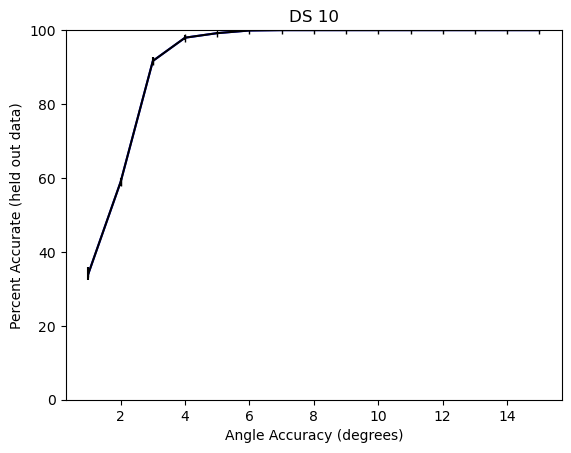

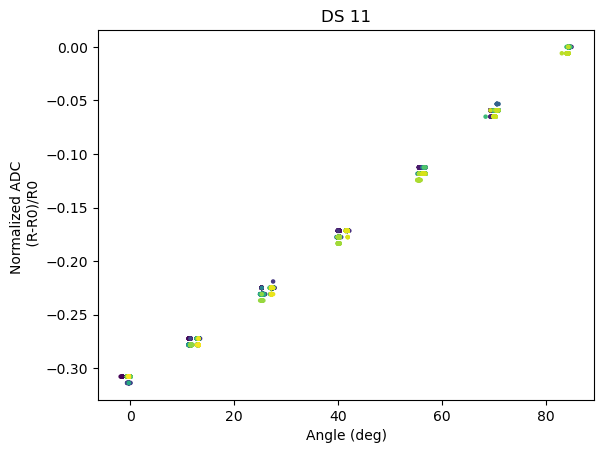

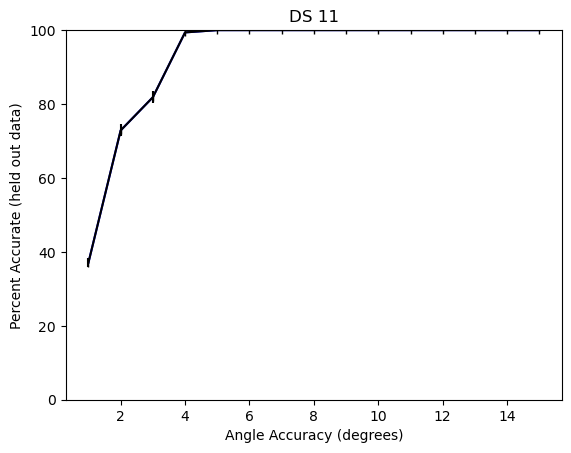

In [8]:
misalignment_0 = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")
misalignment_8 = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/8 deg/*.csv")
misalignment_20 = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/20 deg/*.csv")

reapplication_1 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/first test/*.csv")
reapplication_2 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")
reapplication_3 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/third test/*.csv")
reapplication_4 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/fourth test/*.csv")

length_1 = os.path.join(path_to_repository , "CSV Data/12_9_2024/first/*.csv")
length_2 = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")
length_3 = os.path.join(path_to_repository , "CSV Data/12_9_2024/third/*.csv")
length_4 = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p3/*.csv")
length_5 = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv")

DS_all = [misalignment_0, misalignment_8, misalignment_20, reapplication_1, reapplication_2, reapplication_3, reapplication_4, length_1, length_2, length_3, length_4, length_5]

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.plot_data(scatter=True, title='DS %d'%i_d)

    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

Using normalize_adc_bw_01():: Now fit model on dataset 1 and test on dataset 2 and 3 etc. 

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  -103.0 ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -96.0 ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -100.0 ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\

ADC normalized bw 0-1. ADC max:  -116.0 ADC min:  -169.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  -97.0 ADC min:  -152.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  -103.0 ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -96.0 ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -100.0 ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Str

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  -103.0 ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -96.0 ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -100.0 ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\

C:\Users\toppenheim\Desktop\UCSF\Preeya UCB\Strain-Sensor-\Strain-Sensor-\Code\analysis\analysis.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots()


['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  -103.0 ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -96.0 ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -100.0 ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\

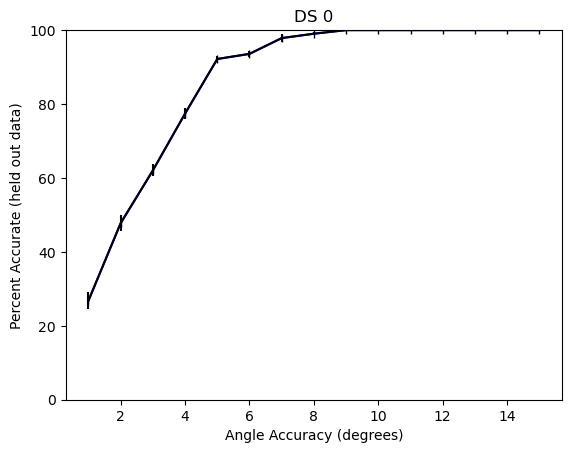

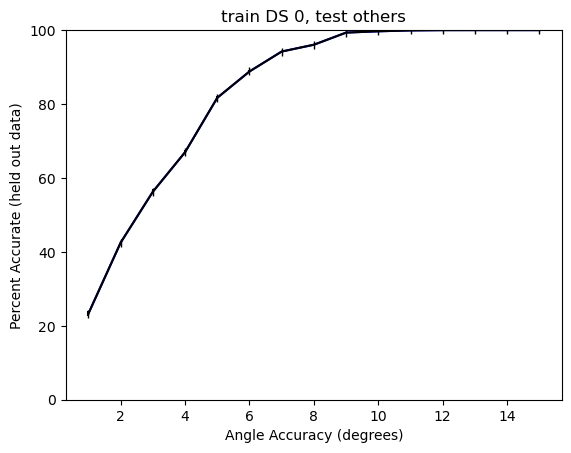

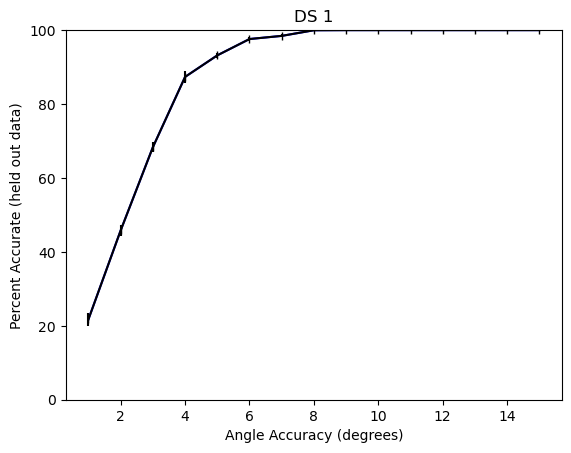

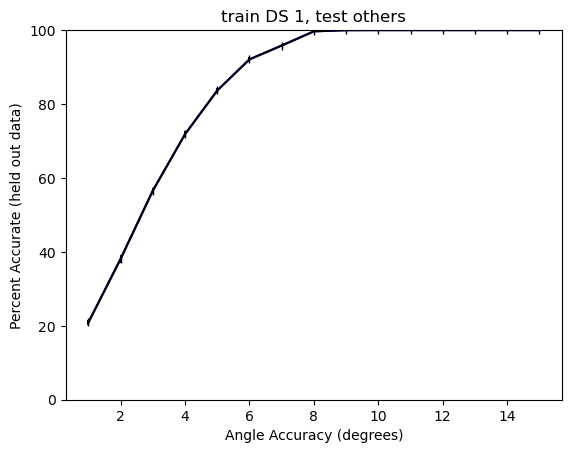

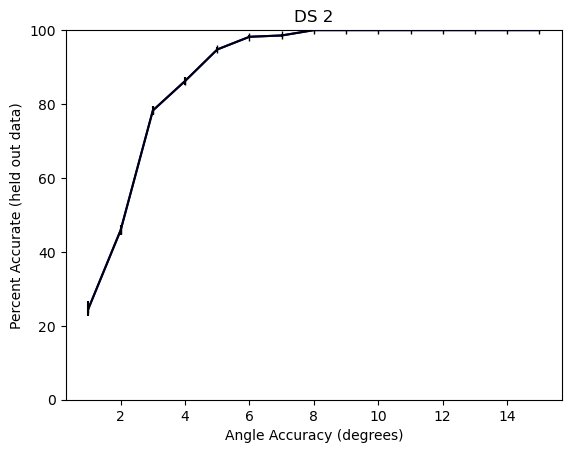

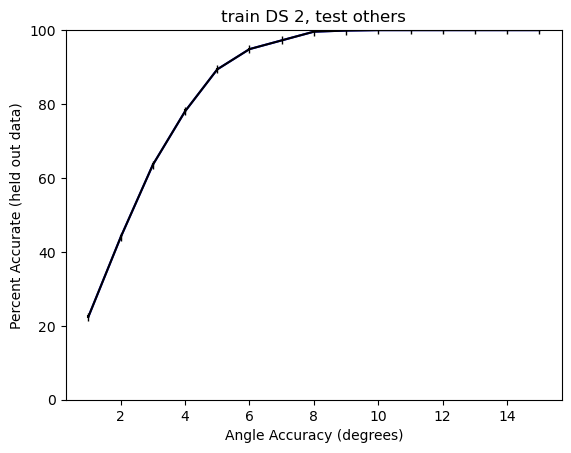

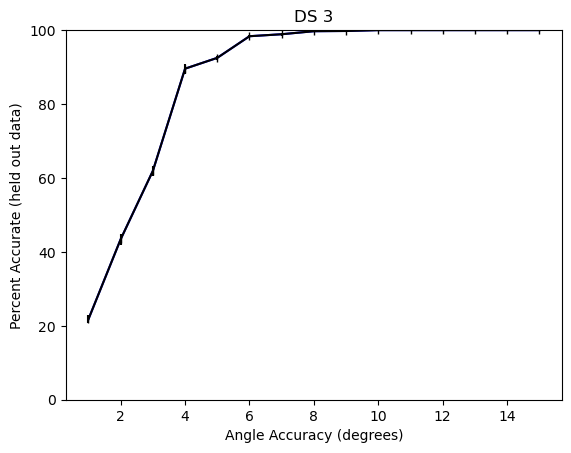

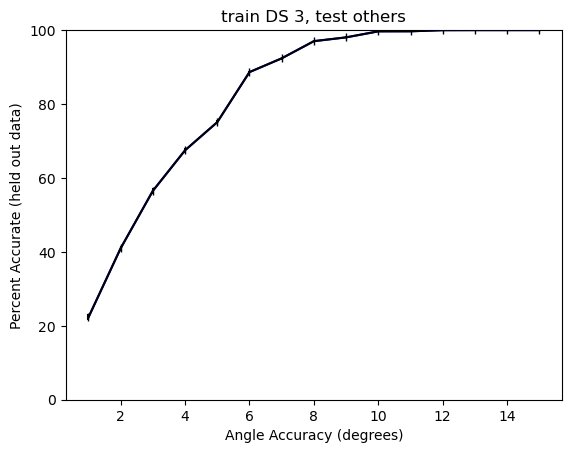

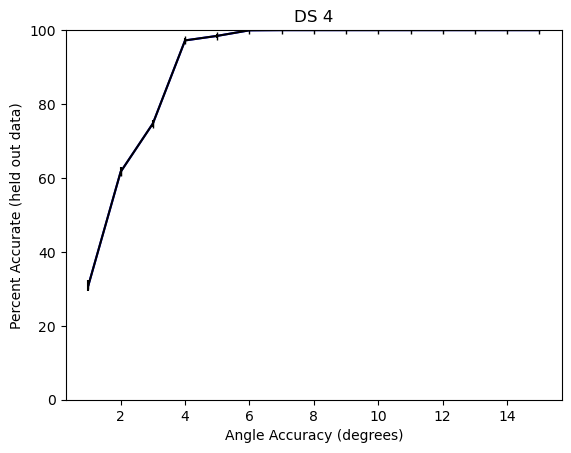

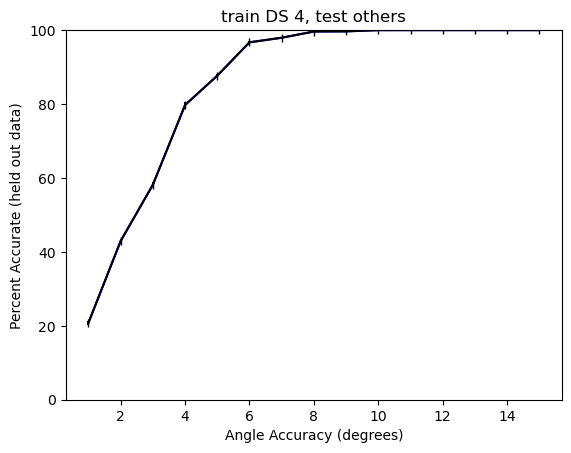

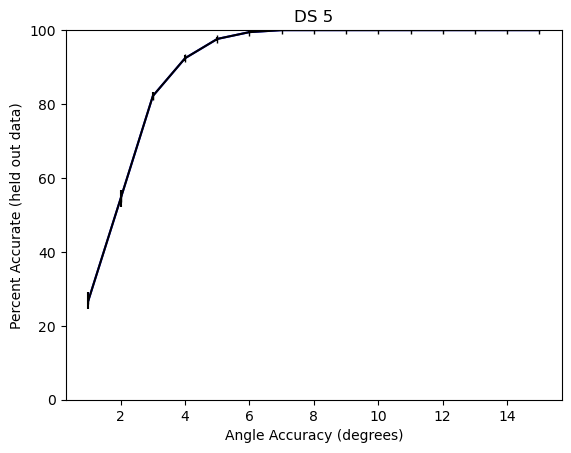

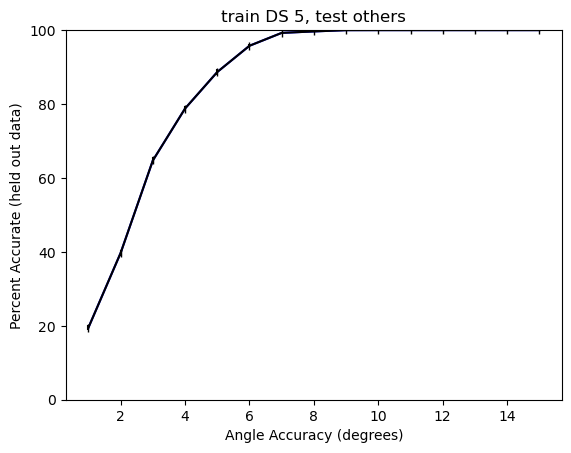

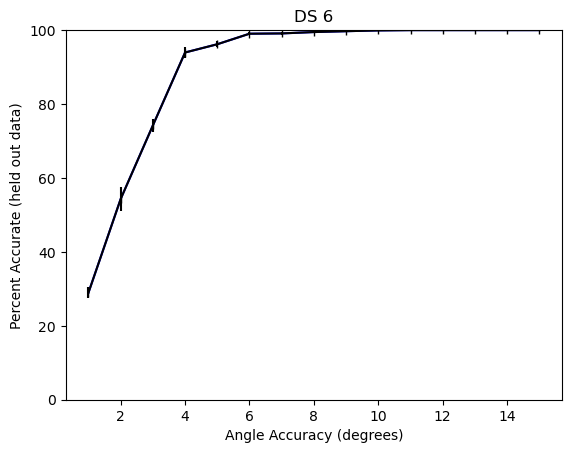

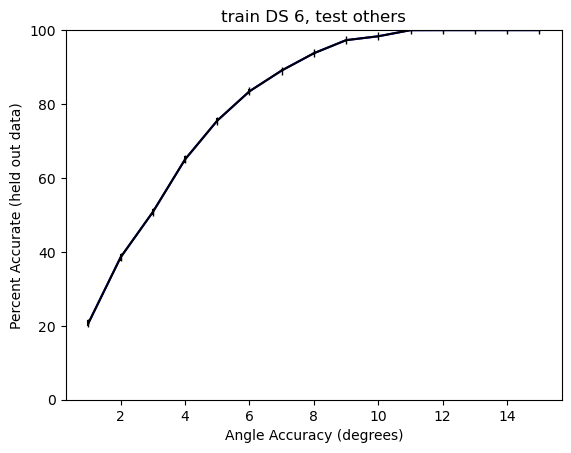

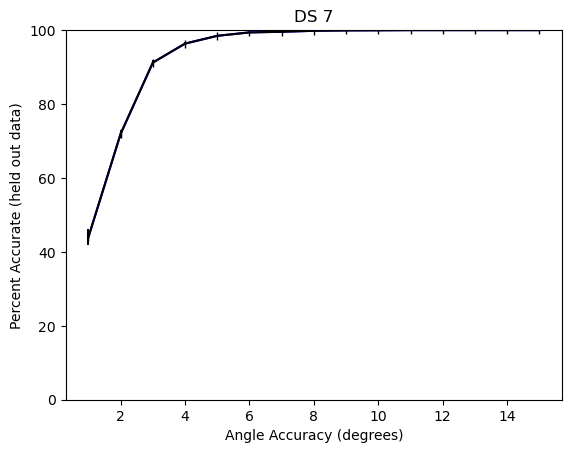

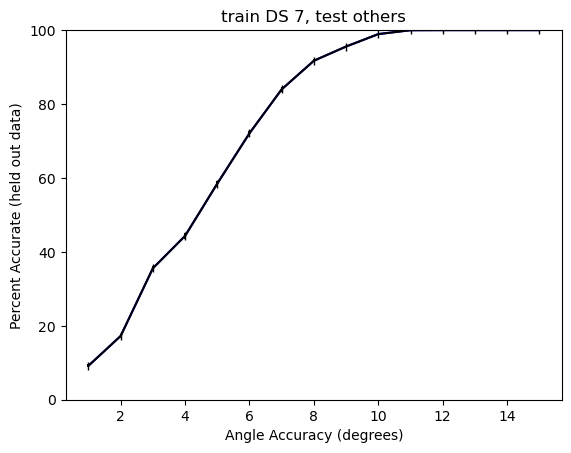

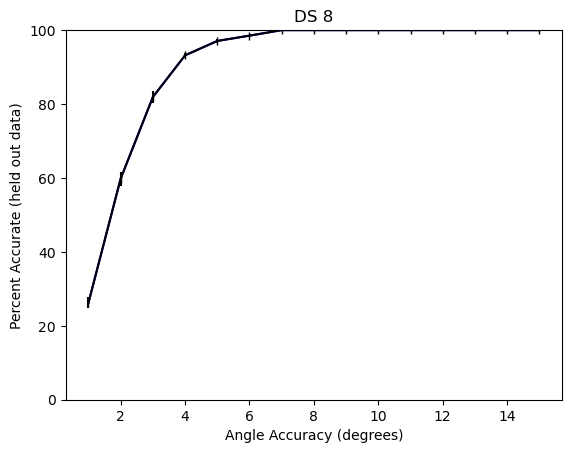

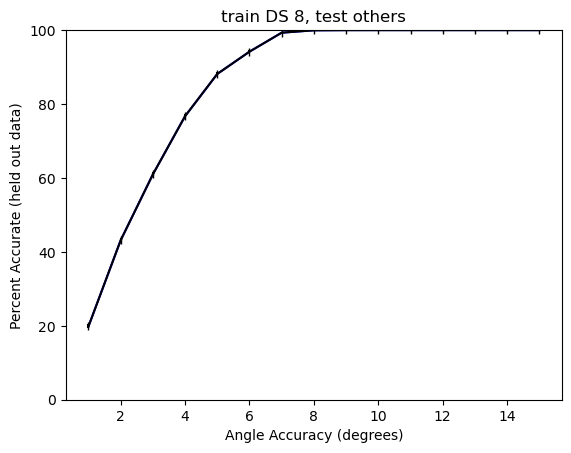

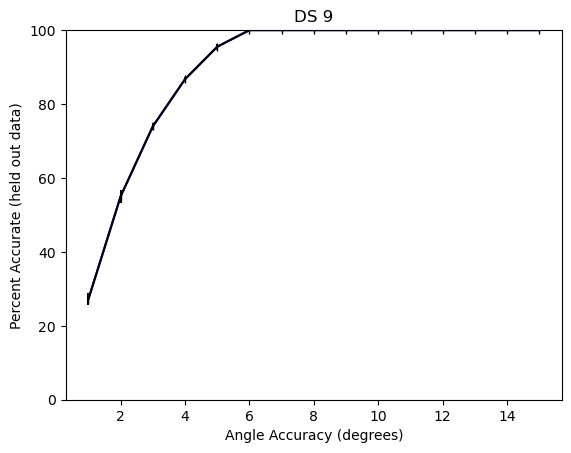

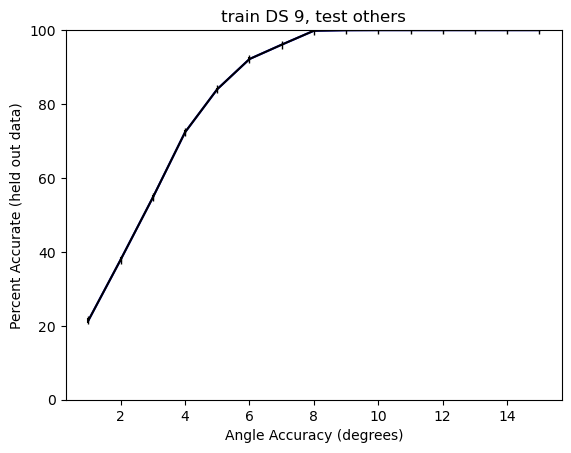

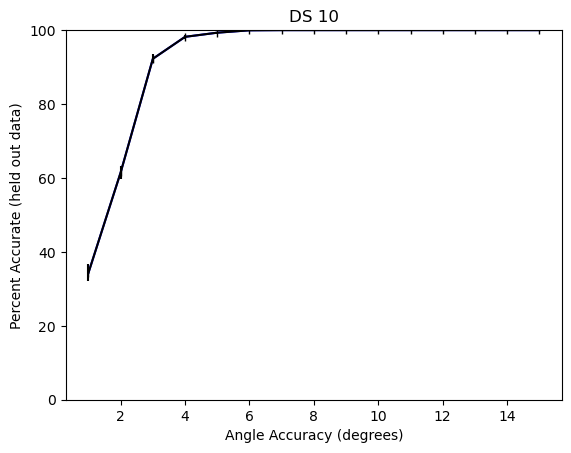

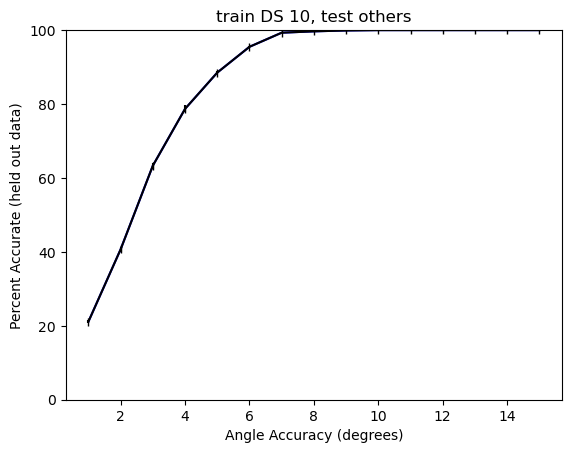

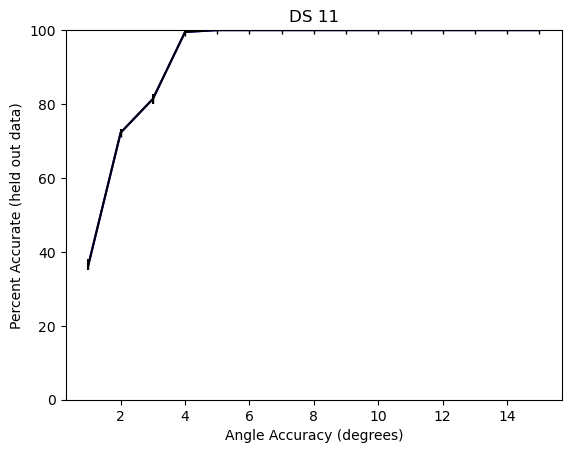

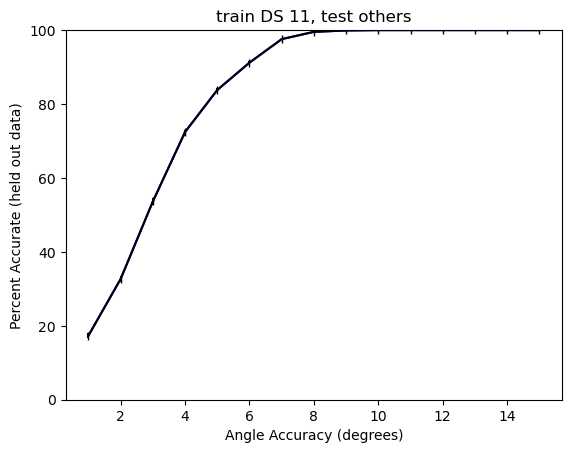

In [9]:
# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    # Train on one dataset
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    g.plot_accuracy(title=f'DS {i_d}')

    # Test on all other datasets
    ixs = list(range(len(DS_all)))
    ixs.remove(i_d)

    # Load and normalize the other datasets dynamically
    combined_data = []
    for ix in ixs:
        temp_g = bender_class()
        temp_g.load_data(DS_all[ix])
        temp_g.normalize_adc_bw_01()
        combined_data.append(temp_g.data)

    # Combine all test datasets into one DataFrame
    df_combined = pd.concat(combined_data, ignore_index=True)

    # Evaluate the model on the combined dataset
    acc = []
    for _ in range(10):  # Repeat testing 10 times for variability
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack(acc)

    # Plot accuracy for the combined testing
    g.plot_accuracy(title=f'train DS {i_d}, test others', accuracy=acc)